In [1]:
import cv2
import numpy as np

In [143]:
def draw(img,winname='my_drawing'):
    refPt =[]

    #global refPt
    
    # Create a function based on a CV2 Event (Left button click)
    drawing = False # True if mouse is pressed
    ix,iy = -1,-1

    # mouse callback function
    def draw_rectangle(event,x,y,flags,param):
        global ix,iy,drawing,mode

        if event == cv2.EVENT_LBUTTONDOWN:
            # When you click DOWN with left mouse button drawing is set to True
            drawing = True
            # Then we take note of where that mouse was located
            ix,iy = x,y

        elif event == cv2.EVENT_MOUSEMOVE:
            # Now the mouse is moving
            if drawing == True:
                # If drawing is True, it means you've already clicked on the left mouse button
                # We draw a rectangle from the previous position to the x,y where the mouse is
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)


        elif event == cv2.EVENT_LBUTTONUP:
            # Once you lift the mouse button, drawing is False
            drawing = False
            # we complete the rectangle.
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        
            refPt .append ([[ix,iy],[x,y]])
        

    # Create a black image

    # This names the window so we can reference it 
    cv2.namedWindow(winname=winname)
    # Connects the mouse button to our callback function
    cv2.setMouseCallback(winname,draw_rectangle)

    while True: #Runs forever until we break with Esc key on keyboard
        # Shows the image window

        cv2.imshow(winname,img)
        # EXPLANATION FOR THIS LINE OF CODE:
        # https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163

        # CHECK TO SEE IF ESC WAS PRESSED ON KEYBOARD
        if cv2.waitKey(1) & 0xFF == 27:
            break
    # Once script is done, its usually good practice to call this line
    # It closes all windows (just in case you have multiple windows called)
    cv2.destroyAllWindows()
    
#     pt= refPt[-1]
#     x1= pt[0][0]
#     y1= pt[0][1]
#     x2= pt[1][0]
#     y2= pt[1][1]

    #return x1,y1,x2,y2,refPt
    return refPt
 

In [144]:
# Some imports and helper functions
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import pygco  # "conda install pygco -c kayarre" If you can't get it installed, try the next line
# import networkx  # "conda install networkx" This library can also perform the graph cut algorithm, but it is much (!) slower so try installing pygco first

def draw_mask_on_image(image, mask, color=(0, 255, 255)):
    """Return a visualization of a mask overlaid on an image."""
    result = image.copy()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated = cv2.morphologyEx(mask.astype(np.uint8), cv2.MORPH_DILATE, kernel)
    outline = dilated > mask
    result[mask == 1] = (result[mask == 1] * 0.4 + 
                         np.array(color) * 0.6).astype(np.uint8)
    result[outline] = color
    return result

<IPython.core.display.Javascript object>


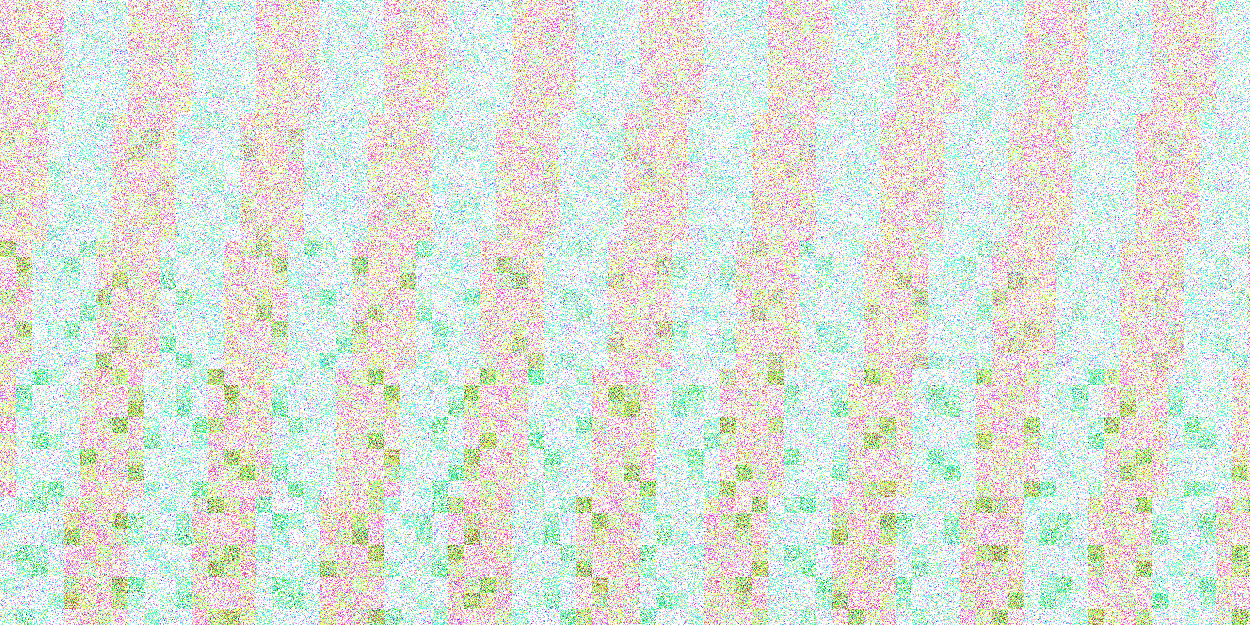

In [148]:
im = imageio.imread('lotus320.jpg')
h,w = im.shape[:2]

init_fg_mask = np.zeros([h, w])
init_bg_mask = np.zeros([h, w])

# Now set some rectangular region of the initial foreground mask to 1.
# This should be a part of the image that is fully foreground.
# The indices in the following line are just an example,
# and they need to be corrected so that only flower pixels are included
# init_fg_mask[10:20, 15:30] = 1

# Same for the background (replace the indices)
# init_bg_mask[60:90, 50:110] = 1

### BEGIN SOLUTION
init_fg_mask = np.zeros([h, w])
init_bg_mask = np.zeros([h, w])


img = cv2.imread('lotus320.jpg')
refPt_bg = draw(img,winname='Background')
for _,cordinates  in enumerate(refPt_bg):
    x1= cordinates[0][0]
    y1= cordinates[0][1]
    x2= cordinates[1][0]
    y2= cordinates[1][1]
    init_bg_mask[y1:y2, x1:x2] = 1


img = cv2.imread('lotus320.jpg')   
refPt_fg = draw(img,winname='Foreground')
for _,cordinates  in enumerate(refPt_fg):
    x1= cordinates[0][0]
    y1= cordinates[0][1]
    x2= cordinates[1][0]
    y2= cordinates[1][1]
    init_fg_mask[y1:y2, x1:x2] = 1    
    
### END SOLUTION

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Initial foreground mask')
axes[0].imshow(draw_mask_on_image(im, init_fg_mask))
axes[1].set_title('Initial background mask')
axes[1].imshow(draw_mask_on_image(im, init_bg_mask))
fig.tight_layout()